In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

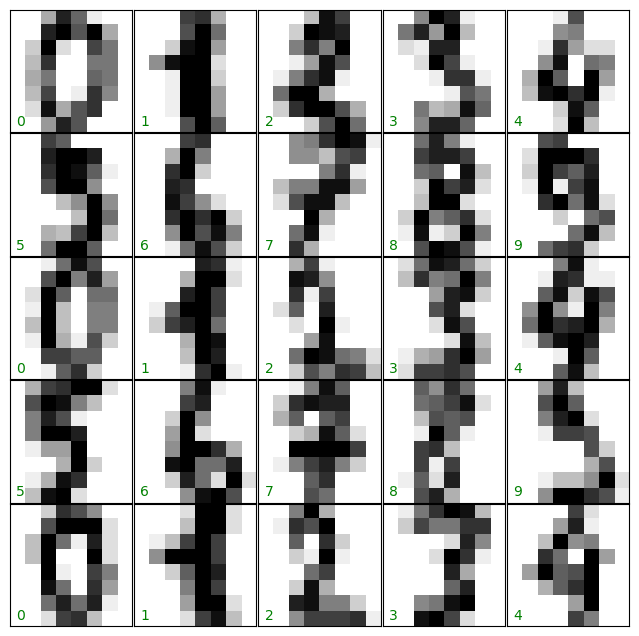

In [3]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [4]:
#resim verisi 

In [5]:
X = digits.data
X.shape

(1797, 64)

In [6]:
#1797 örnek 8x8 piksl boyutunda olduğu için 64 fatures

In [7]:
X[10]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [8]:
# Resimlerin labellarını y ye atadık

In [9]:
y = digits.target
y.shape

(1797,)

In [10]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
# Verileri görselleştirmek için manifold learning te olan isomapi kullanarak veriyi 2 boyuta düşürüp görselleştireceğiz

In [12]:
from sklearn.manifold import Isomap

In [57]:
iso = Isomap(n_components=2,n_neighbors=10)
iso.fit(digits.data);
data_projected= iso.fit_transform(digits.data);
data_projected.shape

(1797, 2)

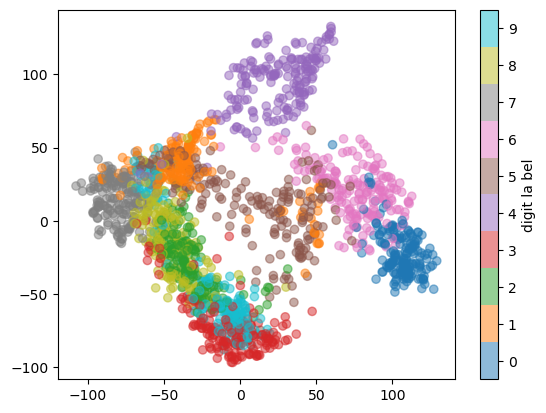

In [59]:
plt.scatter(data_projected[:,0],data_projected[:,1], c = digits.target,alpha=0.5,cmap='tab10')
plt.colorbar(label = "digit la bel", ticks=range(10))
plt.clim(-0.5,9.5)

In [15]:
#görselde görüldüğü gibi 0 rakamı iyi bir şekilde ayrışıyor. 7 ve 2 rakamı ise birbirlerine biraz benzediği için daha yakın.

In [16]:
# Şimdi bir tahmin yaptıralım bununiçin guassiannb yi kullanacağız.

In [17]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [19]:
model = GaussianNB()
model.fit(Xtrain,ytrain)
y_model = model.predict(Xtest)

In [20]:
accuracy_score(ytest,y_model)

0.8555555555555555

In [21]:
# Kısa bir örnek ile %85 e yakın bir doğruluk sağladık peki hangi sayıları tahmininde yanılıdığını gösterelim.
# Bunun için confusion (karışıklık) matrisini göstererek rahatlıkla bulabiliriz.

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [23]:
mat = confusion_matrix(ytest,y_model)

Text(113.9222222222222, 0.5, 'TRUE VALUE')

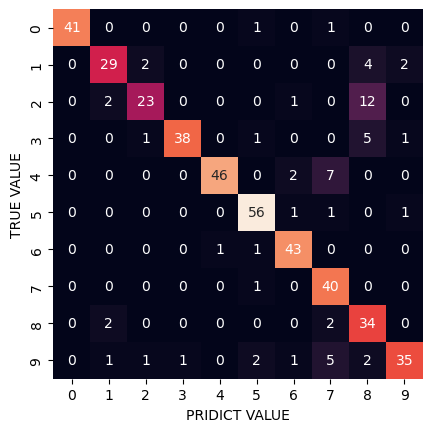

In [24]:
sns.heatmap(mat,square=True,annot=True,cbar=False)
plt.xlabel("PRIDICT VALUE")
plt.ylabel("TRUE VALUE")

In [25]:
#burada görüldüğü üzere 8 tahminini yaptığı fakat 2 olan 12 tane tahmin göze çarpmakta.

In [26]:
# Göresel ve label olark ta gösterevilriz 

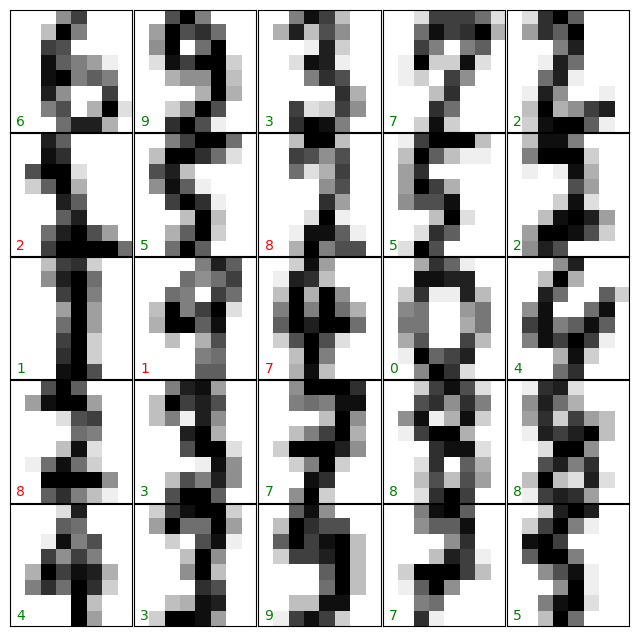

In [27]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))

test_images = Xtest.reshape(-1,8,8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')